In [1]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import scipy.stats as stats

In [2]:
df=pd.read_csv('crime4.csv')

In [3]:
df.describe()

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,lwtrd,lwfir,lwser,lwmfg,lwfed,lwsta,lwloc,lmix,lpctymle,lpctmin
count,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,...,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,100.60000,84.000000,0.031588,0.307368,0.688618,0.425518,8.954540,0.001917,1.386062,30.239194,...,5.232423,5.579433,5.364625,5.615181,5.988757,5.677787,5.540139,-2.234233,-2.443015,2.913361
std,58.03627,2.001589,0.018121,0.171205,1.690345,0.087245,2.658082,0.002735,1.439703,11.454695,...,0.214391,0.277204,0.360098,0.272747,0.158761,0.176131,0.159691,0.649565,0.196784,0.954615
min,1.00000,81.000000,0.001812,0.058824,0.068376,0.148936,4.220000,0.000458,0.197719,14.302560,...,2.825760,1.257233,0.611825,4.623305,5.542831,5.153407,5.097363,-6.008814,-2.778080,0.249708
25%,51.00000,82.000000,0.018352,0.217902,0.347692,0.374403,7.160000,0.001191,0.532944,23.425595,...,5.124259,5.462580,5.253943,5.455450,5.890330,5.553570,5.424002,-2.585961,-2.543456,2.303045
50%,103.00000,84.000000,0.028441,0.278240,0.474375,0.428571,8.495000,0.001451,0.952595,27.792330,...,5.222935,5.577550,5.377477,5.604311,6.001366,5.667706,5.533923,-2.281916,-2.486930,3.212684
75%,151.00000,86.000000,0.038406,0.352518,0.635597,0.483189,10.197500,0.001803,1.507818,33.271223,...,5.322137,5.711883,5.510016,5.768172,6.097062,5.803605,5.667369,-1.903749,-2.416943,3.643437
max,197.00000,87.000000,0.163835,2.750000,37.000000,0.678571,25.830000,0.035578,8.827652,119.761500,...,7.715457,6.233362,7.685734,6.472115,6.393507,6.306275,5.961237,1.386294,-1.293320,4.164309


In [4]:
df.columns

Index(['county', 'year', 'crmrte', 'prbarr', 'prbconv', 'prbpris', 'avgsen',
       'polpc', 'density', 'taxpc', 'west', 'central', 'urban', 'pctmin80',
       'wcon', 'wtuc', 'wtrd', 'wfir', 'wser', 'wmfg', 'wfed', 'wsta', 'wloc',
       'mix', 'pctymle', 'd82', 'd83', 'd84', 'd85', 'd86', 'd87', 'lcrmrte',
       'lprbarr', 'lprbconv', 'lprbpris', 'lavgsen', 'lpolpc', 'ldensity',
       'ltaxpc', 'lwcon', 'lwtuc', 'lwtrd', 'lwfir', 'lwser', 'lwmfg', 'lwfed',
       'lwsta', 'lwloc', 'lmix', 'lpctymle', 'lpctmin'],
      dtype='object')

In [5]:
missing_county_values = df['county'].isnull().sum()
print("Number of missing values in 'county' column:", missing_county_values)

Number of missing values in 'county' column: 0


In [6]:
num_observations = df['county'].count()
print('Number of observasions:', num_observations)

Number of observasions: 630


In [7]:
num_counties = df['county'].nunique()
print("Number of unique counties:", num_counties)

Number of unique counties: 90


In [8]:
ratio_observations_counties = num_observations / num_counties
print("Ratio of observations to counties:", ratio_observations_counties)

Ratio of observations to counties: 7.0


In [9]:
average_values = df.groupby('year')[['crmrte', 'polpc']].mean()
print("Average values of crmrte and polpc over the years:")
print(average_values)

Average values of crmrte and polpc over the years:
        crmrte     polpc
year                    
81    0.032750  0.001722
82    0.032648  0.001697
83    0.030708  0.001873
84    0.029452  0.002162
85    0.029759  0.002230
86    0.032286  0.002025
87    0.033510  0.001708


In [10]:
selected_years = df[df['year'].isin([81, 84, 87])]

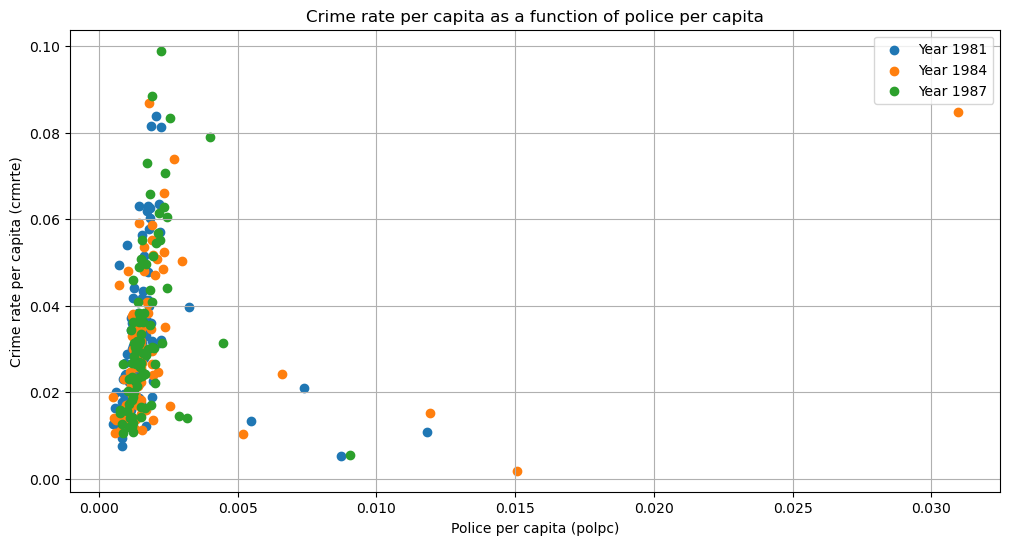

In [11]:
plt.figure(figsize=(12, 6))

for year in [81, 84, 87]:
    subset = selected_years[selected_years['year'] == year]
    plt.scatter(subset['polpc'], subset['crmrte'], label=f'Year {year + 1900}')

plt.xlabel('Police per capita (polpc)')
plt.ylabel('Crime rate per capita (crmrte)')
plt.title('Crime rate per capita as a function of police per capita')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
west_1982 = df[(df['west'] == 1) & (df['year'] == 82)]
west_1987 = df[(df['west'] == 1) & (df['year'] == 87)]

stats_1982 = west_1982[['crmrte', 'polpc']].describe()
stats_1987 = west_1987[['crmrte', 'polpc']].describe()

stats_1982.loc['median'] = west_1982[['crmrte', 'polpc']].median()
stats_1987.loc['median'] = west_1987[['crmrte', 'polpc']].median()

In [13]:
print("Descriptive statistics for 1982 (West):")
print(stats_1982)

Descriptive statistics for 1982 (West):
           crmrte      polpc
count   21.000000  21.000000
mean     0.020832   0.002042
std      0.008986   0.002658
min      0.003660   0.000739
25%      0.016447   0.001070
50%      0.019854   0.001368
75%      0.029021   0.001541
max      0.037154   0.012809
median   0.019854   0.001368


In [14]:
print("\nDescriptive statistics for 1987 (West):")
print(stats_1987)


Descriptive statistics for 1987 (West):
           crmrte      polpc
count   21.000000  21.000000
mean     0.020561   0.001965
std      0.009549   0.001719
min      0.005533   0.000860
25%      0.014193   0.001234
50%      0.017187   0.001516
75%      0.026984   0.001830
max      0.043735   0.009054
median   0.017187   0.001516


In [15]:
central_1982 = df[(df['central'] == 1) & (df['year'] == 82)]
central_1987 = df[(df['central'] == 1) & (df['year'] == 87)]

avg_west_1982 = west_1982[['crmrte', 'polpc']].mean()
avg_west_1987 = west_1987[['crmrte', 'polpc']].mean()

avg_central_1982 = central_1982[['crmrte', 'polpc']].mean()
avg_central_1987 = central_1987[['crmrte', 'polpc']].mean()

In [16]:
print("Average values for West in 1982:")
print(avg_west_1982)

print("\nAverage values for West in 1987:")
print(avg_west_1987)

print("\nAverage values for Central in 1982:")
print(avg_central_1982)

print("\nAverage values for Central in 1987:")
print(avg_central_1987)

Average values for West in 1982:
crmrte    0.020832
polpc     0.002042
dtype: float64

Average values for West in 1987:
crmrte    0.020561
polpc     0.001965
dtype: float64

Average values for Central in 1982:
crmrte    0.037578
polpc     0.001829
dtype: float64

Average values for Central in 1987:
crmrte    0.037508
polpc     0.001650
dtype: float64


In [17]:
county_25 = df[df['county'] == 25]

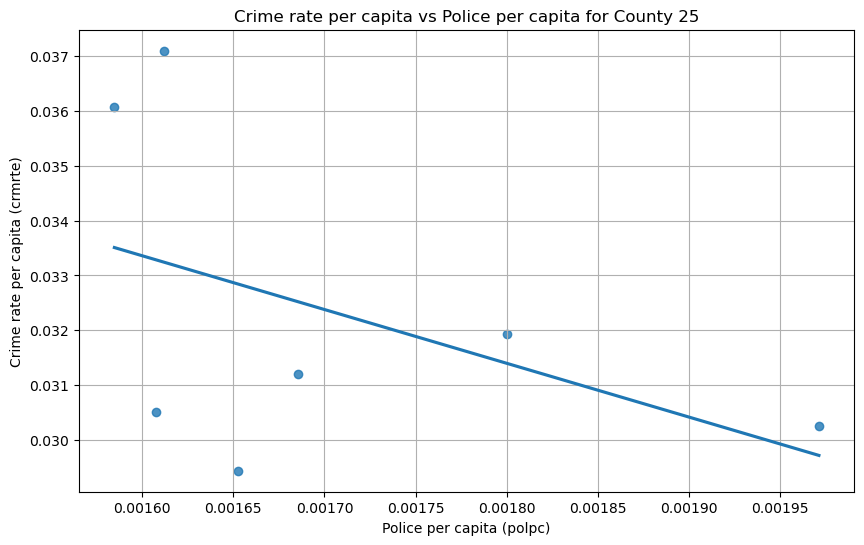

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(x='polpc', y='crmrte', data=county_25, scatter=True, ci=None)
plt.xlabel('Police per capita (polpc)')
plt.ylabel('Crime rate per capita (crmrte)')
plt.title('Crime rate per capita vs Police per capita for County 25')
plt.grid(True)
plt.show()

In [19]:
counties_25_35 = df[df['county'].isin([25, 35])]

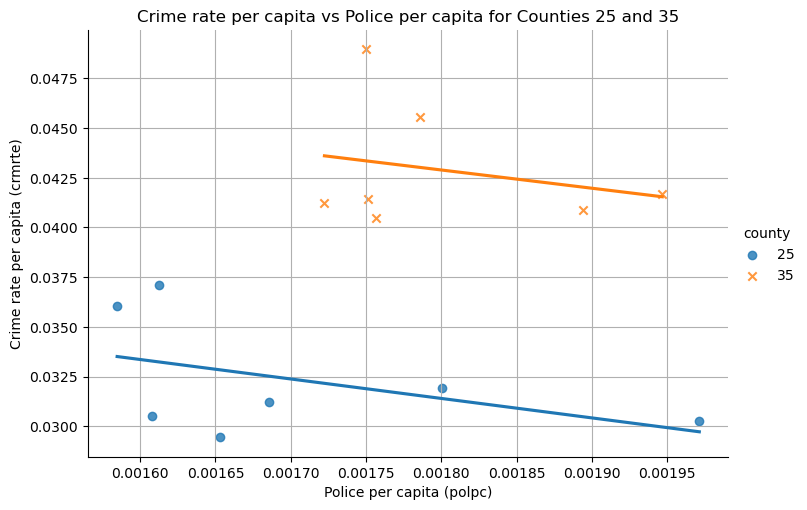

In [20]:
sns.lmplot(x='polpc', y='crmrte', hue='county', data=counties_25_35, aspect=1.5, markers=["o", "x"], ci=None)
plt.xlabel('Police per capita (polpc)')
plt.ylabel('Crime rate per capita (crmrte)')
plt.title('Crime rate per capita vs Police per capita for Counties 25 and 35')
plt.grid(True)
plt.show()

In [21]:
data_1982 = df[df['year'] == 82]

model_level_level = ols(formula='crmrte ~ polpc', data=data_1982).fit()
print(model_level_level.summary())

                            OLS Regression Results                            
Dep. Variable:                 crmrte   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6884
Date:                Mon, 11 Nov 2024   Prob (F-statistic):              0.409
Time:                        13:41:21   Log-Likelihood:                 239.16
No. Observations:                  90   AIC:                            -474.3
Df Residuals:                      88   BIC:                            -469.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0341      0.002     13.647      0.0

In [22]:
data_1982['log_crmrte'] = np.log(data_1982['crmrte'])
data_1982['log_polpc'] = np.log(data_1982['polpc'])

/var/folders/31/wrh4sf894gg4nqlv2cwkbzbm0000gn/T/ipykernel_49321/3938748539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1982['log_crmrte'] = np.log(data_1982['crmrte'])
/var/folders/31/wrh4sf894gg4nqlv2cwkbzbm0000gn/T/ipykernel_49321/3938748539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1982['log_polpc'] = np.log(data_1982['polpc'])


In [23]:
model_log_log = ols(formula='log_crmrte ~ log_polpc', data=data_1982).fit()
print(model_log_log.summary())

                            OLS Regression Results                            
Dep. Variable:             log_crmrte   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.1113
Date:                Mon, 11 Nov 2024   Prob (F-statistic):              0.739
Time:                        13:41:21   Log-Likelihood:                -72.465
No. Observations:                  90   AIC:                             148.9
Df Residuals:                      88   BIC:                             153.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3004      0.776     -4.256      0.0

In [24]:
df['log_crmrte'] = np.log(df['crmrte'])
df['log_polpc'] = np.log(df['polpc'])

In [25]:
model_log_log_years = ols(formula='log_crmrte ~ log_polpc + C(year)', data=df).fit()
print(model_log_log_years.summary())

                            OLS Regression Results                            
Dep. Variable:             log_crmrte   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.727
Date:                Mon, 11 Nov 2024   Prob (F-statistic):            0.00858
Time:                        13:41:21   Log-Likelihood:                -532.87
No. Observations:                 630   AIC:                             1082.
Df Residuals:                     622   BIC:                             1117.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.5275      0.288     -8.782

In [26]:
df['clcrmrte'] = df['log_crmrte'].diff()
df['clpolpc'] = df['log_polpc'].diff()

In [27]:
print(df[['log_crmrte', 'log_polpc', 'clcrmrte', 'clpolpc']].head(10))

   log_crmrte  log_polpc  clcrmrte   clpolpc
0   -3.221757  -6.327329       NaN       NaN
1   -3.261134  -6.338698 -0.039376 -0.011370
2   -3.496449  -6.300275 -0.235315  0.038424
3   -3.360269  -6.273350  0.136180  0.026925
4   -3.308445  -6.253141  0.051824  0.020209
5   -3.359507  -6.268431 -0.051062 -0.015290
6   -3.335309  -6.304588  0.024198 -0.036157
7   -4.110956  -7.428800 -0.775647 -1.124212
8   -3.959896  -7.257738  0.151060  0.171061
9   -4.189808  -7.325242 -0.229912 -0.067504


In [28]:
print(df[['log_crmrte', 'log_polpc', 'clcrmrte', 'clpolpc']].head(10))

   log_crmrte  log_polpc  clcrmrte   clpolpc
0   -3.221757  -6.327329       NaN       NaN
1   -3.261134  -6.338698 -0.039376 -0.011370
2   -3.496449  -6.300275 -0.235315  0.038424
3   -3.360269  -6.273350  0.136180  0.026925
4   -3.308445  -6.253141  0.051824  0.020209
5   -3.359507  -6.268431 -0.051062 -0.015290
6   -3.335309  -6.304588  0.024198 -0.036157
7   -4.110956  -7.428800 -0.775647 -1.124212
8   -3.959896  -7.257738  0.151060  0.171061
9   -4.189808  -7.325242 -0.229912 -0.067504
